In [1]:
import pygame as pg
import numpy as np
import math
import random

def map_range(val, min_from, max_from, min_to, max_to):
    val -= min_from
    val /= (max_from-min_from)
    val *= (max_to-min_to)
    val += min_to
    return val

target_points = []

def f(x):
    return math.cos(x)


def init_target_points():
    global target_points
    target_points = []
    random_scale_x = random.random()*2 -1
    random_scale_y = random.random()*2 -1
    random_shift_y = random.random()*2 -1
    random_shift_x = random.random()*2 -1
    for x in np.arange(-1, 1, 0.01):
        y = f(x*random_scale_x + random_shift_x*2*math.pi)*0.5 + random_shift_y
        if abs(x) < 0.3:
            target_points.append((x, y))

class Sinfunc:
    def __init__(self):
        self.coefficients = []
        for c in [1, 1, 0, 0, 0, 1, 0, 0]:
            self.coefficients.append(c)
        self.derivatives = []
        self.lr = 0.1
        self.increase_complexity()

    def eval(self, x):
        sx = self.coefficients[0]
        sy = self.coefficients[1]
        tx = self.coefficients[2]
        ty = self.coefficients[3]
        x *= sx
        x += tx
        result = 1
        coeffs_per_iteration = 4
        for coefficient_index in range(4, len(self.coefficients)-coeffs_per_iteration, 4):
            inner_shift = self.coefficients[coefficient_index]
            inner_scale = self.coefficients[coefficient_index+1]
            outer_scale = self.coefficients[coefficient_index+2]
            outer_shift = self.coefficients[coefficient_index+3]
            result *= math.sin(result + x*math.pi*2*inner_scale + inner_shift)*outer_scale + outer_shift
        return result*sy + ty

    def increase_complexity(self):
        for c in [0, 1, 1, 0]:
                    self.coefficients.append(c)
        self.derivatives = []
        for i in range(len(self.coefficients)):
            self.derivatives.append(0)

    def approximate(self, targets):
        dx = 0.00000001
        error_sum = 0
        for coefficient_index, coefficient in enumerate(self.coefficients):
            total_change = 0
            for target in targets:
                tx, ty = target
                y0 = self.error(ty, self.eval(tx))
                self.coefficients[coefficient_index] += dx
                y1 = self.error(ty, self.eval(tx))
                self.coefficients[coefficient_index] = coefficient
                dydc = (y1-y0)/dx
                total_change += dydc
            self.derivatives[coefficient_index] += (total_change*abs(total_change)*0.01/len(self.coefficients))
        for coefficient_index, coefficient in enumerate(self.coefficients):
            self.coefficients[coefficient_index] -= self.derivatives[coefficient_index]*self.lr
            self.derivatives[coefficient_index] *= 0.8
            a = random.random()
            b = random.random()
            if a < b:
                self.derivatives[coefficient_index] += (random.random()*2-1)*(b-a)*((1-b)**5)

    def error(self, val, expected_val):
        x = expected_val-val
        return 0.5*x**2

bg_col = (0, 0, 0)
pg.init()
width, height = (1920, 1080)
screen = pg.display.set_mode((width, height))
screen.set_colorkey((0, 0, 0))
clock = pg.time.Clock()
running = True

func = Sinfunc()

while running:
    mouse_x, mouse_y = pg.mouse.get_pos()
    mouse_x = map_range(mouse_x, 0, width, -1, 1)
    mouse_y = map_range(mouse_y, height, 0, -1, 1)
    for event in pg.event.get():
        if event.type == pg.QUIT:
            running = False
        if event.type == pg.KEYDOWN:
            if event.key == pg.K_ESCAPE:
                running = False
            if event.key == pg.K_a:
                func.lr /= 1.05
                print(func.lr)
            if event.key == pg.K_d:
                func.lr *= 1.05
                print(func.lr)
        if event.type == pg.MOUSEBUTTONDOWN:
            if event.button == 1:
                target_points = []
            else:
                func.increase_complexity()
        if event.type == pg.MOUSEMOTION:
            target_points.append((mouse_x, mouse_y))
    func.lr = 0.0075
    func.approximate(target_points)
    
    size = width, height
    my_image = pg.Surface(size, pg.SRCALPHA)
    my_image.fill((0, 0, 0, 1))
    screen.blit(my_image, (0, 0))
    
    
    for point in target_points:
        px, py = point
        px = map_range(px, -1, 1, 0, width)
        py = map_range(py, -1, 1, height, 0)
        pg.draw.circle(screen, (125, 125, 255), (px, py), 5, 0)

    ps = []
    for x in np.arange(-1 + random.random()*0.01, 1, 0.02):
        y = func.eval(x)
        point = (map_range(x, -1, 1, 0, width), map_range(y, -1, 1, height, 0))
        ps.append(point)
    pg.draw.aalines(screen, (255, 255, 255), False, ps)
    pg.display.flip()
    clock.tick(60)
pg.quit()




pygame 2.0.0 (SDL 2.0.12, python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


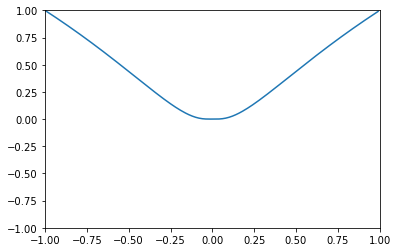

In [169]:
import matplotlib.pyplot as plt
import numpy as np

xs = np.arange(-1, 1, 0.01)
ys = []
for x in xs:
    y = abs(x)**(1/abs(x)**0.25)
    ys.append(y)
    

plt.plot(xs, ys)
plt.ylim([-1, 1])
plt.xlim([-1, 1])
plt.show()

6.123233995736766e-17